In [11]:
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc
import numpy.ma as ma
import math
import pandas as pd
import os
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point

C:\Users\nd20983\docs\Simulations\data\rawdata\xpgxaa.pdclann.nc


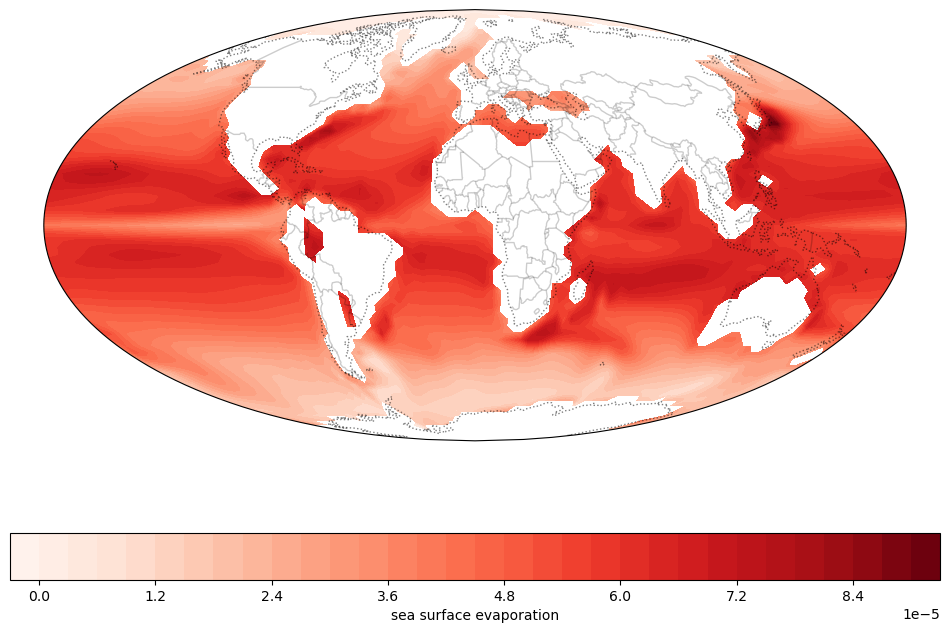

In [44]:
def xr_add_cyclic_point(da):
    """
    Inputs
    da: xr.DataArray with dimensions (t,latitude,longitude)
    """

    # Use add_cyclic_point to interpolate input data
    lon_idx = da.dims.index('longitude')
    wrap_data, wrap_lon = add_cyclic_point(da.values, coord=da.longitude, axis=lon_idx)

    # Generate output DataArray with new data but same structure as input
    outp_da = xr.DataArray(data=wrap_data,
                           coords = {'t': da.t, 'latitude': da.latitude, 'longitude': wrap_lon},
                           dims=da.dims,
                           attrs=da.attrs)

    return outp_da

# path
homepath = r"C:\Users\nd20983\docs\Simulations\data\rawdata"
expts = ['xpgxa',] #'xpgxb', 'xpgxc', 'xpgxx', 'xpgxw', 'xpgxr', 'xpgxs', 
         #'xpgxt', 'xpgxh', 'xpgcy',]
for expt in expts:
     exptpath = os.path.abspath(os.path.join(homepath, expt+'a.pdclann.nc'))
     print(exptpath)
     ds = xr.open_dataset(exptpath, decode_times=False)
evap = ds.evapsea_mm_srf.isel(t=0, surface=0)
evap.attrs = ds.evapsea_mm_srf.attrs
precip = ds.precip_mm_srf.isel(t=0, surface=0)
precip.attrs = ds.precip_mm_srf.attrs
# lon, lat, t
lon = ds.longitude
lat = ds.latitude
time = ds.t
# figure
fig = plt.figure(figsize=(12,8))
ax = plt.axes(projection=ccrs.Mollweide())
ax.coastlines(linestyle=':', alpha=0.5)
ax.add_feature(cfeature.BORDERS, linestyle='-', alpha=0.2)

# plot
data = xr_add_cyclic_point(evap)
# data = evap.isel(t=0, surface=0)
im = plt.contourf(data.longitude, data.latitude, data, 30, 
                  transform=ccrs.PlateCarree(), cmap='Reds')
cbar = plt.colorbar(orientation='horizontal', label='sea surface evaporation')
